In [1]:
#https://tdcommons.ai/benchmark/admet_group/overview/
#pip install PyTDC
from tdc import utils
names = utils.retrieve_benchmark_names('ADMET_Group')

In [2]:
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')
benchmark = group.get('Caco2_Wang')#一种人克隆结肠腺癌细胞

predictions = {}
name = benchmark['name']
train_val, test = benchmark['train_val'], benchmark['test']


Found local copy...


In [3]:
train_val

,Drug_ID,Drug,Y
0,H 95/71,CC(C)NCC(O)COc1ccc(NC=O)cc1,-5.427984
1,H 244/45,CCC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1,-5.219842
2,D-Phe-D-Ala-D-Ser-OH,C[C@H](NC(=O)[C@H](N)Cc1ccccc1)C(=O)N[C@H](CO)...,-6.281999
3,Dexloxiglumide,CCCCCN(CCCOC)C(=O)[C@@H](CCC(=O)O)NC(=O)c1ccc(...,-5.140131
4,Ac-D-phe-NH2,CC(=O)N[C@@H](Cc1ccccc1)C(N)=O,-5.100090
...,...,...,...
723,11,CCCCCCC(N)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N1CCC...,-5.790000
724,Gancyclovir,Nc1nc2c(ncn2COC(CO)CO)c(=O)[nH]1,-6.101228
725,Val-ACV,CC(C)C(N)C(=O)OCCOCn1cnc2c(=O)[nH]c(N)nc21,-5.669776
726,1033-Dextromethorphan (DEM),COc1ccc2c(c1)[C@@]13CCCC[C@@H]1[C@@H](C2)N(C)CC3,-4.628932


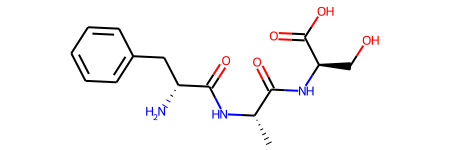

In [4]:
#conda install -c conda-forge rdkit,如果报错可先更新conda，conda update -n base conda，conda update --all
from rdkit import Chem
from rdkit.Chem import AllChem
mol = Chem.MolFromSmiles(train_val["Drug"][2])
mol

In [5]:
import deepchem as dc
#conda install tensorflow
#conda install tensorflow-probability
#conda install pandas joblib scikit-learn numpy
#conda install git
#git clone https://github.com/deepchem/deepchem.git
#cd deepchem
#python setup.py install
#pip install --upgrade scikit-learn
smiles = []
for i in range(0,len(train_val["Drug"])):
    smiles.append(train_val["Drug"][i])
smiles

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (G:\anaconda\lib\site-packages\deepchem-2.7.1.dev20221222170726-py3.8.egg\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


['CC(C)NCC(O)COc1ccc(NC=O)cc1',
 'CCC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1',
 'C[C@H](NC(=O)[C@H](N)Cc1ccccc1)C(=O)N[C@H](CO)C(=O)O',
 'CCCCCN(CCCOC)C(=O)[C@@H](CCC(=O)O)NC(=O)c1ccc(Cl)c(Cl)c1',
 'CC(=O)N[C@@H](Cc1ccccc1)C(N)=O',
 'O=C(O)c1ccccc1',
 'COC(=O)c1ccc(O)cc1',
 'CCCOC(=O)c1ccc(O)cc1',
 'CCCCOC(=O)c1ccc(O)cc1',
 'CCCCCCCCOC(=O)c1ccc(O)cc1',
 'NC(N)=NN=Cc1c(Cl)cccc1Cl',
 'C[C@@](N)(Cc1ccc(O)c(O)c1)C(=O)O',
 'O=C(O)c1cc(Cl)ccc1O',
 'CNC[C@H](O)c1ccc(O)c(O)c1',
 'CNC(=O)[C@@H](Cc1ccccc1)NC(=O)[C@@H](CC(C)C)NC(C)=O',
 'CC(=O)NCC(=O)NCCc1ccccc1',
 'CC(=O)N[C@@H](C(=O)NCCc1ccccc1)C(C)C',
 'CC(=O)C(NC(=O)CN)c1ccc(O)cc1',
 'NC(N)=N/N=C/c1c(Cl)cccc1Cl',
 'CNS(=O)(=O)c1ccc(Cl)cc1',
 'NS(=O)(=O)c1ccc(Cl)cc1',
 'O=C(O)C(O)Cc1ccc(O)c(O)c1',
 'COCCc1ccc(OCC(O)CNC(C)C)cc1',
 'CC(=O)Nc1ccc(O)cc1',
 'CN(C)c1ccc(C(=O)NCCCCCNC(=O)CS)cc1',
 'O=C(CCCCCCC(=O)Nc1ccccc1)NO',
 'Nc1ccc(S(=O)(=O)O)cc1',
 'CCOP(=O)(OCC)Oc1ccc(N(O)O)cc1',
 'C=C(C)CNc1ccc(C(C)C(=O)O)cc1',
 'CC(NC(=O)[C@@H](N)CCC(=O)OCc1ccccc1)C(=O

In [6]:
SIMLES =[]
for smile in smiles:
    SIMLES.append(Chem.MolFromSmiles(smile))

featurizer = dc.feat.CircularFingerprint(size=1024)
ecfp = featurizer.featurize(SIMLES)

In [7]:
ecfp

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
train_val["Y"]

0     -5.427984
1     -5.219842
2     -6.281999
3     -5.140131
4     -5.100090
         ...   
723   -5.790000
724   -6.101228
725   -5.669776
726   -4.628932
727   -4.740000
Name: Y, Length: 728, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ecfp, train_val["Y"],test_size=0.2)

In [17]:
X_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [18]:
y_train

627   -5.300515
432   -5.948847
576   -4.569318
695   -4.200000
9     -4.880000
         ...   
708   -4.620000
552   -6.231422
10    -4.330000
285   -4.550000
585   -4.331274
Name: Y, Length: 582, dtype: float64

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9946461503655402

In [12]:
print(reg.coef_)
print(reg.intercept_)

[ 5.39983087e+10  8.42571168e+10  2.88740379e+10 ... -7.79766626e+09
 -1.04180697e+10 -3.73846918e+10]
33728404192.99697


In [13]:
y_predict = reg.predict(X_test)

In [14]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

mean_absolute_error: 53701828877.59859
mean_squared_error: 7.67015777978912e+21
rmse: 87579436968.89767
r2 score: -1.3369019959808298e+22


In [23]:
#tensorflow-卷积
import os
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)
print(tf.__version__)

#X_train,X_test,y_train,y_test
#X_train = X_train.as_matrix()
#X_test = X_test.as_matrix()
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#Xtrain = Xtrain / 255.0
Xtext = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=128, kernel_size=3, input_shape=(X_train.shape[1], 1)),
  #tf.keras.layers.MaxPooling1D(pool_size=2),
  #tf.keras.layers.Conv1D(filters=32, kernel_size=3),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  #tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1000, activation='linear'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='MSE', metrics=['MeanSquaredError'])
model.summary()
model.fit(Xtrain, y_train, batch_size=100, epochs=200,validation_data=(Xtext, y_test))
test_loss = model.evaluate(Xtext, y_test)

y_predict = model.predict(Xtext)
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

2.8.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1022, 128)         512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 511, 128)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 65408)             0         
                                                                 
 dense_3 (Dense)             (None, 1000)              65409000  
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1001      
                                                

Epoch 44/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.5515 - val_mean_squared_error: 0.5515
Epoch 45/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.5590 - val_mean_squared_error: 0.5590
Epoch 46/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.5497 - val_mean_squared_error: 0.5497
Epoch 47/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.5505 - val_mean_squared_error: 0.5505
Epoch 48/200
6/6 [==============================] - 0s 19ms/step - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.5527 - val_mean_squared_error: 0.5527
Epoch 49/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.5579 - val_mean_squared_error: 0.5579
Epoch 50/200
6/6 [================

Epoch 95/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.6094 - val_mean_squared_error: 0.6094
Epoch 96/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.6391 - val_mean_squared_error: 0.6391
Epoch 97/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.5991 - val_mean_squared_error: 0.5991
Epoch 98/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.6129 - val_mean_squared_error: 0.6129
Epoch 99/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.5914 - val_mean_squared_error: 0.5914
Epoch 100/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.6141 - val_mean_squared_error: 0.6141
Epoch 101/200
6/6 [==============

Epoch 196/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.6274 - val_mean_squared_error: 0.6274
Epoch 197/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0556 - mean_squared_error: 0.0556 - val_loss: 0.6456 - val_mean_squared_error: 0.6456
Epoch 198/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.6286 - val_mean_squared_error: 0.6286
Epoch 199/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.6147 - val_mean_squared_error: 0.6147
Epoch 200/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6148 - mean_squared_error: 0.6148
mean_absolute_error: 0.5824468434302134
mean_squared_error: 0.6147573040232226
rmse: 0.7840646044958429
r2 score: -0.07151676717533739


In [31]:
#tensorflow-全连接
import os
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = InteractiveSession(config=config)
print(tf.__version__)

#X_train,X_test,y_train,y_test
#X_train = X_train.as_matrix()
#X_test = X_test.as_matrix()
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[1])
#Xtrain = Xtrain / 255.0
Xtext = X_test.reshape(X_test.shape[0], X_test.shape[1])
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='linear', input_shape=(X_train.shape[1],  )),
  tf.keras.layers.Dense(512, activation='linear'),
  tf.keras.layers.Dense(256, activation='linear'),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='MSE', metrics=['MeanSquaredError'])
model.summary()
model.fit(Xtrain, y_train, batch_size=100, epochs=200,validation_data=(Xtext, y_test))
test_loss = model.evaluate(Xtext, y_test)

y_predict = model.predict(Xtext)
print("mean_absolute_error:", mean_absolute_error(y_test, y_predict))
print("mean_squared_error:", mean_squared_error(y_test, y_predict))
print("rmse:", sqrt(mean_squared_error(y_test, y_predict)))
print("r2 score:", r2_score(y_test, y_predict))

2.8.0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 525,569
Trainable params: 525,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 0s 19ms/step - loss: 9.0297 - mean_squared_error: 9.0297 - val_loss: 4.9409 - val_mean_squared_error: 4.9409
Epoch 2/200
6/

6/6 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 1.0542 - val_mean_squared_error: 1.0542
Epoch 98/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 1.0453 - val_mean_squared_error: 1.0453
Epoch 99/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 1.0565 - val_mean_squared_error: 1.0565
Epoch 100/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 1.0398 - val_mean_squared_error: 1.0398
Epoch 101/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 1.0211 - val_mean_squared_error: 1.0211
Epoch 102/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 1.0746 - val_mean_squared_error: 1.0746
Epoch 103/200
6/6 [==============================]

Epoch 148/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 1.0139 - val_mean_squared_error: 1.0139
Epoch 149/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 1.0361 - val_mean_squared_error: 1.0361
Epoch 150/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 1.0489 - val_mean_squared_error: 1.0489
Epoch 151/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.9900 - val_mean_squared_error: 0.9900
Epoch 152/200
6/6 [==============================] - 0s 5ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 1.0374 - val_mean_squared_error: 1.0374
Epoch 153/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 1.0304 - val_mean_squared_error: 1.0304
Epoch 154/200
6/6 [===============

Epoch 199/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 1.0197 - val_mean_squared_error: 1.0197
Epoch 200/200
5/5 [==============================] - 0s 3ms/step - loss: 0.9877 - mean_squared_error: 0.9877
mean_absolute_error: 0.678526298928854
mean_squared_error: 0.9876549490296446
rmse: 0.9938083059773875
r2 score: -0.7214741998884655


In [21]:
X_train.shape[1]

1024

In [25]:
# -*- coding: utf-8 -*-
#pytorch版本全连接实现
import pandas as pd
import re
import numpy as np
import torch
from sklearn.impute import SimpleImputer
import sys
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [26]:
class fingerprints(nn.Module):
    def __init__(self):
        super(fingerprints, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1],256) # 全连接层
        #print(self.fc1.weight.shape)
        self.fc2 = nn.Linear(256,512) # 全连接层
        self.fc3 = nn.Linear(512,256) # 全连接层
        self.fc4 = nn.Linear(256,1) # 全连接层
        #self.fc7 = nn.Linear(200,1) # 全连接层

    def forward(self, x):
        #print("0:"+ str(x.size())) # 输出tensor大小
        x = F.relu(self.fc1(x))
        #print("1:"+ str(x.size())) # 输出tensor大小
        x = F.relu(self.fc2(x))
        #print("2:"+ str(x.size())) # 输出tensor大小
        x = F.relu(self.fc3(x))
        #x = F.relu(self.fc6(x))
        x = F.softplus(self.fc4(x))
        #prelu = torch.nn.PReLU(num_parameters=1)
        return x

In [27]:
#n_epochs = 200 # 模型训练20轮
log_interval = 210 #控制打印频率的，设n = 210*batch_size，即n张图后打印一次进度
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 根据设备是否支持GPU来选择硬件 
#DEVICE_1 = torch.device("cpu") # 根据设备是否支持GPU来选择硬件 
learn_rate = 0.03 # 学习率
momentum = 0.1  # 动量
network_fingerprints = fingerprints().to(DEVICE)
network_fingerprints.eval()
optimizer_fingerprints = optim.SGD(network_fingerprints.parameters(), lr=learn_rate, momentum=momentum) # 学习率，动量
train_losses = []
train_counter = []

In [28]:
def train(epoch, device):
    network_fingerprints.train() # 调用上一步实例化对象network中的方法（该方法包内已经写好）
    for batch_idx, (data, target) in enumerate(trainloader_fp): # 按batch_size为集合对象进行逐个处理
        data, target = data.to(device), target.to(device) # data是图片，target是标签，device是为了有GPU情况下使用GPU加速
        optimizer_fingerprints.zero_grad() # 开始进行BP之前将梯度设置为零，因为PyTorch会在随后的BP中累积梯度    
        output_fp = network_fingerprints(data) 
        loss_fn = nn.SmoothL1Loss()
        loss2 = loss_fn(output_fp, target)
        #print(loss)
        loss2.backward(retain_graph=True) # 根据误差进行BP
        optimizer_fingerprints.step()
        if batch_idx % log_interval == 0: # 控制输出频率
            print('Train fp Epoch: {} \tLoss: {:.6f}'.format(epoch, loss2.item()))
    #print(hi_fp.shape)
    #print(hi_fv.shape)
    #hi_fp = F.normalize(hi_fp,p=2,dim=0)
    optimizer_fingerprints.step()
    return loss2

In [29]:
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平方绝对误差
def test(device,n):
    network_fingerprints.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        i = 0
        for data,target in testloader_fp:
            data, target = data.to(device), target.to(device)
            output = network_fingerprints(data)
            loss_fn = nn.SmoothL1Loss()
            out = output.cuda().data.cpu().detach().numpy()
            tar = target.cuda().data.cpu().detach().numpy()
            MSE = mean_squared_error(out, tar)
            MAE = mean_absolute_error(out, tar)
            print('test fp MSE: {:.6f}'.format(MSE))
            print('test fp MAE: {:.6f}'.format(MAE))
            #print(target)
            #print("输出")
            loss = loss_fn(output, target)
            i = i+1
        print('test fp Loss: {:.6f}'.format(loss.item()))
        return out

In [30]:
import torch
from sklearn.model_selection import train_test_split
trainset_fp = torch.utils.data.TensorDataset(torch.FloatTensor(np.array(X_train)), torch.FloatTensor(np.array(y_train)))
#trainloader_fp = torch.utils.data.DataLoader(trainset_fp, batch_size=len(y_train), shuffle=True, num_workers=2)
trainloader_fp = torch.utils.data.DataLoader(trainset_fp, batch_size=100, shuffle=False, num_workers=2)
testset_fp = torch.utils.data.TensorDataset(torch.FloatTensor(np.array(X_test)), torch.FloatTensor(np.array(y_test)))
testloader_fp = torch.utils.data.DataLoader(testset_fp, batch_size=len(y_test), shuffle=True, num_workers=2)
#testloader_fp = torch.utils.data.DataLoader(testset_fp, batch_size=100, shuffle=False, num_workers=0)
print("开始训练和测试")
n_epochs = 50
for epoch in range(1, n_epochs + 1):
    train(epoch, DEVICE)
    test(DEVICE,i)

开始训练和测试
Train fp Epoch: 1 	Loss: 5.268903
test fp MSE: 34.532715
test fp MAE: 5.827456
test fp Loss: 5.327455
Train fp Epoch: 2 	Loss: 5.194738
test fp MSE: 33.763607
test fp MAE: 5.761119
test fp Loss: 5.261119
Train fp Epoch: 3 	Loss: 5.128575
test fp MSE: 33.080093
test fp MAE: 5.701526
test fp Loss: 5.201525
Train fp Epoch: 4 	Loss: 5.069171
test fp MSE: 32.461323
test fp MAE: 5.647042
test fp Loss: 5.147042
Train fp Epoch: 5 	Loss: 5.014823
test fp MSE: 31.891655
test fp MAE: 5.596420
test fp Loss: 5.096421
Train fp Epoch: 6 	Loss: 4.964302
test fp MSE: 31.360209
test fp MAE: 5.548790
test fp Loss: 5.048790
Train fp Epoch: 7 	Loss: 4.916822
test fp MSE: 30.861582
test fp MAE: 5.503735
test fp Loss: 5.003736
Train fp Epoch: 8 	Loss: 4.871942
test fp MSE: 30.393755
test fp MAE: 5.461134
test fp Loss: 4.961134
Train fp Epoch: 9 	Loss: 4.829527
test fp MSE: 29.958612
test fp MAE: 5.421216
test fp Loss: 4.921215
Train fp Epoch: 10 	Loss: 4.789765
test fp MSE: 29.561541
test fp MAE: 5.3